In [1]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d saherhassan7/mramr-dataset

from zipfile import ZipFile
base_dir="/content/mramr-dataset.zip"
with ZipFile(base_dir , 'r')as zip:
  zip.extractall()
  print('done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 97% 140M/144M [00:01<00:00, 157MB/s]
100% 144M/144M [00:01<00:00, 134MB/s]
done


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout,SimpleRNN, GRU, Activation
from tensorflow.keras.models import Sequential
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from cv2 import imread, resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
base_dir = '/content/MR-AMR Dataset'


In [4]:
IMAGE_SIZE=28
BATCH_SIZE=32

In [5]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
    )

In [6]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
)

In [7]:
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    class_mode='categorical',
    seed=42
)

Found 112004 images belonging to 10 classes.


In [8]:
test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 27996 images belonging to 10 classes.


In [9]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add(Dropout(0.1))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.1))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.1))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5,min_delta=0.001,restore_best_weights=True)

In [11]:
optimizer = Adam(learning_rate=0.001)

In [12]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
STEP_SIZE_TRAIN = train_datagen.n//train_datagen.batch_size
STEP_SIZE_VALID = test_datagen.n//test_datagen.batch_size

In [14]:
history = model.fit(train_datagen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=157,
                    validation_data=test_datagen,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[reduce_lr])

Epoch 1/157
3500/3500 [==============================] - 154s 41ms/step - loss: 0.9716 - accuracy: 0.6606 - val_loss: 0.7197 - val_accuracy: 0.7416 - lr: 0.0010
Epoch 2/157
3500/3500 [==============================] - 118s 34ms/step - loss: 0.4671 - accuracy: 0.8411 - val_loss: 0.5775 - val_accuracy: 0.7870 - lr: 0.0010
Epoch 3/157
3500/3500 [==============================] - 139s 40ms/step - loss: 0.3662 - accuracy: 0.8741 - val_loss: 0.4771 - val_accuracy: 0.8261 - lr: 0.0010
Epoch 4/157
3500/3500 [==============================] - 138s 39ms/step - loss: 0.3063 - accuracy: 0.8946 - val_loss: 0.4437 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 5/157
3500/3500 [==============================] - 119s 34ms/step - loss: 0.2685 - accuracy: 0.9081 - val_loss: 0.4018 - val_accuracy: 0.8517 - lr: 0.0010
Epoch 6/157
3500/3500 [==============================] - 119s 34ms/step - loss: 0.2439 - accuracy: 0.9166 - val_loss: 0.3665 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 7/157
3500/3500 [===========

Text(0, 0.5, 'accuracy')

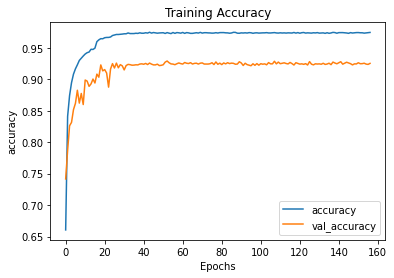

In [15]:
model_loss = pd.DataFrame(model.history.history)

pd.DataFrame(history.history)
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'Loss')

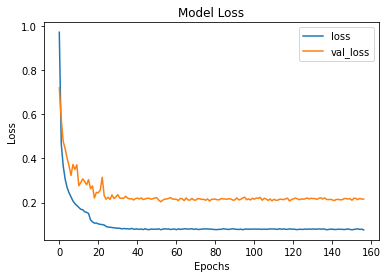

In [16]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [17]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")

In [18]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("water meter with AI & IOT.tflite", "wb").write(tflite_model)

4804952